\begin{equation}
\gamma^2 y''+y=\beta e^{\alpha x}
\\y''= \frac{\beta e^{\alpha x} - y}{\gamma^2}
\end{equation}


In [86]:
import numpy as np
import matplotlib.pyplot as plt

In [87]:
#integration steps:
n=100

#Given variables:
alpha = 1
beta = 1
gamma = 1

x0 = 0
xn = 3.0 * np.pi / 2.0
y0 = 100 
yn = 0

#time step is the time range divided by the integration steps
h = (xn-x0)/n

In [88]:
A = np.zeros(shape=(n-1,n-1))
u = np.zeros(shape=(n-1,1))
b = np.zeros(shape=(n-1,1))

In [89]:
for i in range(n-3):
  j = i + 1
  A[j,j-1]=1
  A[j,j]=-(2-h**2)
  A[j,j+1]=1
  b[j]=h**2*beta*np.exp(alpha*j*h)

A[0,0]= -(2 - h**2)
A[0,1]=1
A[n-2,n-2]=-(2-h**2)
A[n-2,n-3] = 1

b[0] = h**2 * beta * np.exp(alpha * x0 * h) - 100
b[n-2] = h**2 * beta * np.exp(alpha * xn * h)

In [90]:
u = np.linalg.inv(A)*b

In [91]:
u2=[]
u2.append(y0)
for i in range(n-2):
  u2.append(u[i,n-2])
u2.append(yn)
ticks = []
for i in range(n):
  ticks.append(i * h)

In [95]:
truth = []
for i in range(n):
    truth.append( (1/2*np.exp(3*np.pi/2)-yn)*np.sin(i*h) + (y0-1/2)*np.cos(i*h) + 1/2*np.exp(i*h) )

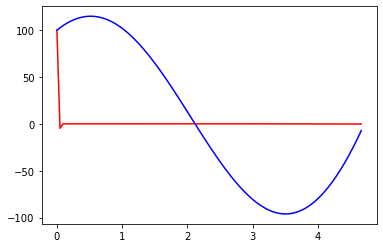

In [96]:
fig = plt.figure()
plt.plot(ticks,u2,color='red')
plt.plot(ticks,truth,color='blue')
plt.show()